# SRGAN 활용하기
--------

## 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기

#### 데이터셋 다운로드

```python
$ pip install tensorflow-datasets

$ python

>> import tensorflow_datasets as tfds 
>> tfds.load("div2k/bicubic_x4")
```

#### 라이브러리 설치

```python
$ pip install opencv-python
$ pip install scikit-image
```

### 프로젝트 1-1.

#### 데이터 준비하기

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3440x1440 at 0x7FD9C073A1D0>


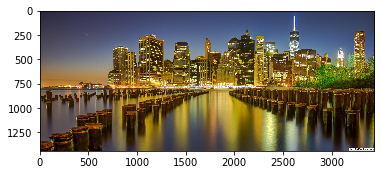

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from skimage import data
import matplotlib.pyplot as plt
import os
from os.path import join
from PIL import Image

hr_image = Image.open('/home/aiffel/aiffel/super_resolution/high_pic.jpg') # 이미지 불러오기

# hr_shape = hr_image.shape[:2]

print(hr_image) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [49]:
import tensorflow as tf

def preprocessing(lr, hr):
    # 이미지의 크기가 크므로 (96,96,3) 크기로 임의 영역을 잘라내어 사용합니다.
    hr = tf.image.random_crop(hr, size=[96, 96, 3])
    hr = tf.cast(hr, tf.float32) / 255.
    
    # 잘라낸 고해상도 이미지의 가로, 세로 픽셀 수를 1/4배로 줄였다가
    # interpolation을 이용해 다시 원래 크기로 되돌립니다.
    # 이렇게 만든 저해상도 이미지를 입력으로 사용합니다.
    lr = tf.image.resize(hr, [96//4, 96//4], "bicubic")
    lr = tf.image.resize(lr, [96, 96], "bicubic")
    return lr, hr

train = train.map(preprocessing).shuffle(buffer_size=10).batch(16)
valid = valid.map(preprocessing).batch(16)
print("✅")

ValueError: in user code:

    <ipython-input-26-a05a0095e209>:5 preprocessing  *
        hr = tf.image.random_crop(hr, size=[96, 96, 3])
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/random_ops.py:382 random_crop
        math_ops.reduce_all(shape >= size),
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py:4003 greater_equal
        "GreaterEqual", x=x, y=y, name=name)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /home/aiffel/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 4 and 3 for '{{node random_crop/GreaterEqual}} = GreaterEqual[T=DT_INT32](random_crop/Shape, random_crop/size)' with input shapes: [4], [3].


In [50]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srcnn.h5'
srcnn = tf.keras.models.load_model(model_file)

In [51]:
def apply_srcnn(image):
    sr = srcnn.predict(image[np.newaxis, ...]/255.)
    sr[sr > 1] = 1
    sr[sr < 0] = 0
    sr *= 255.
    return np.array(sr[0].astype(np.uint8))

srcnn_hr = apply_srcnn(bicubic_hr)

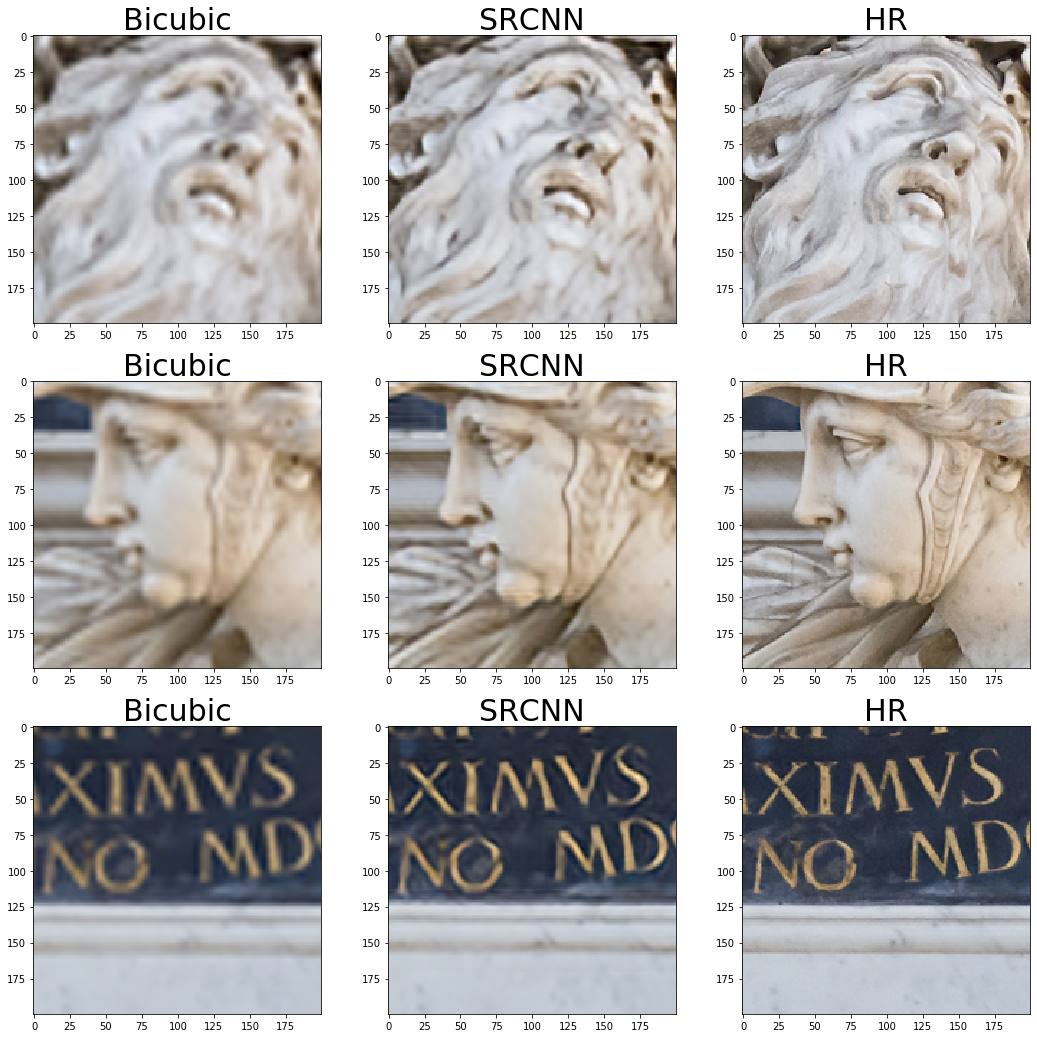

In [52]:
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srcnn_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRCNN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

실패!

### 프로젝트 1-2.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x7FD95C7A4490>


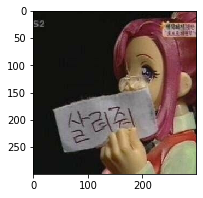

In [53]:
hr_image = Image.open('/home/aiffel/aiffel/super_resolution/low_pic.jpg') # 이미지 불러오기

# hr_shape = hr_image.shape[:2]

print(hr_image) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

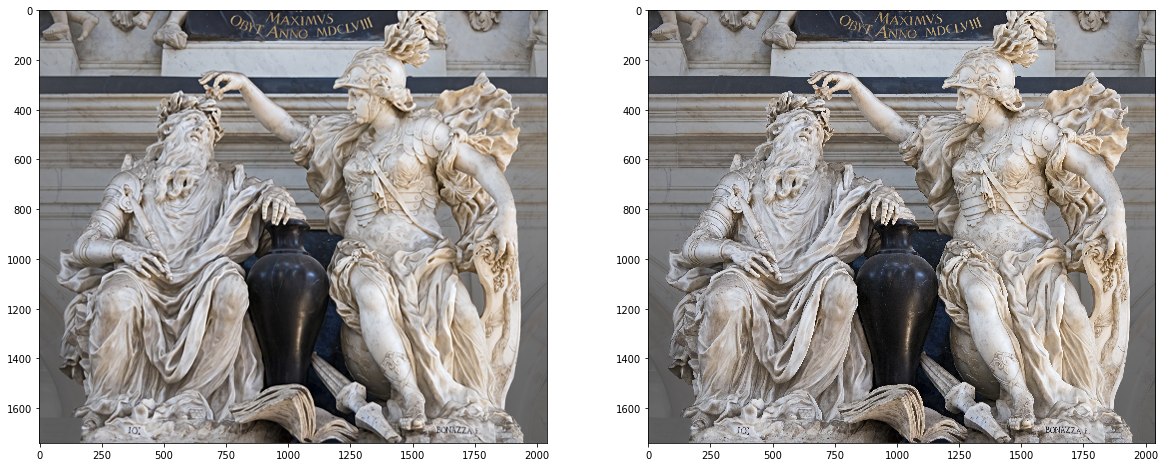

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# # 데이터를 불러옵니다.
# train, valid = tfds.load(
#     "div2k/bicubic_x4", 
#     split=["train","validation"],
#     as_supervised=True
# )

# # 시각화를 위해 한 개의 데이터만 선택합니다.
# for i, (lr, hr) in enumerate(valid):
#     if i == 6: break
    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr_image, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

# 저해상도 및 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_hr)
plt.subplot(1,2,2); plt.imshow(hr_image)

실패!

## 프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기

이전 Super Resolution의 활용 사례에 대해 살펴봤을 때, 단일 이미지가 아닌 영상에 대해 Super Resolution을 적용한 사례가 있었습니다. 이번에는 이미 학습된 SRGAN을 이용해 저해상도 영상을 고해상도 영상으로 바꿔보는 프로젝트를 수행해 봅시다.     
      
실제로 동영상의 Super Resolution은 시간 순서에 따른 다수의 프레임 정보를 고려하는 것이 더 좋지만, 처음부터 학습시키기에 많은 시간이 소요됩니다. 여기서는 이전에 사용했던 SRGAN을 이용해 한 프레임씩 고해상도 이미지로 변환 시켜 모든 프레임에 대해 적용하고, 그 프레임들을 합쳐 동영상으로 만들어 봅시다.      
       
각 프레임들을 모아 gif 파일을 만드는데 아래 라이브러리의 설치가 필요합니다. 

```python
$ pip install imageio
```

### 1. gif 파일 불러오기

GIF 파일 다운로드

```python
GIF files https://drive.google.com/drive/folders/1OLsa4btdwNUiVJcOJgZe_C6-lwEoNr4e
```

In [37]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture("/home/aiffel/aiffel/super_resolution/wine_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 13
frame 크기 : (340, 355, 3)


### 2. 프레임별 Super Resolution 진행하기

## 회고

이번 프로젝트는 왠지 모르게 혼란스럽고 머리가 굴러가지 않았다.   
일단 시도는 이것저것 해봤으나, 값을 바꿀수록 이미 나왔던 이미지들도 사라져서 망했다.   
이번 노드는 별을 못받아도 마땅하며, 일단 답지가 나오면 뜯어보는 수 밖에 없는 것 같다.   
자괴감 드는 하루다.